# Parte 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://learnenough.s3.amazonaws.com/titanic.csv'
titanic = pd.read_csv(url, index_col='Name')
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.iloc[0]['Survived']
titanic.iloc[1]['Survived']
titanic['Survived'].mean()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, Braund, Mr. Owen Harris to Dooley, Mr. Patrick
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


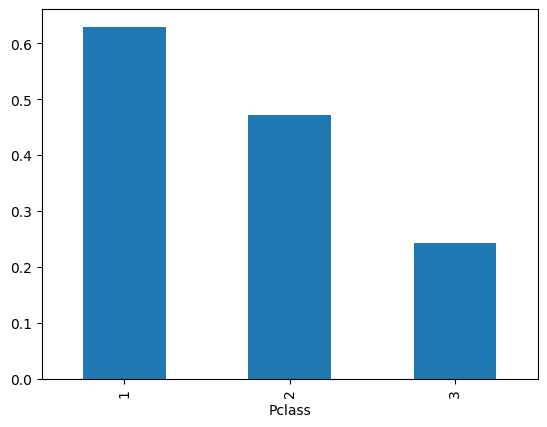

In [ ]:
titanic['Pclass'].unique()
survival_rates = titanic.groupby('Pclass')['Survived'].mean()
survival_rates.plot.bar()
plt.show()

In [ ]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

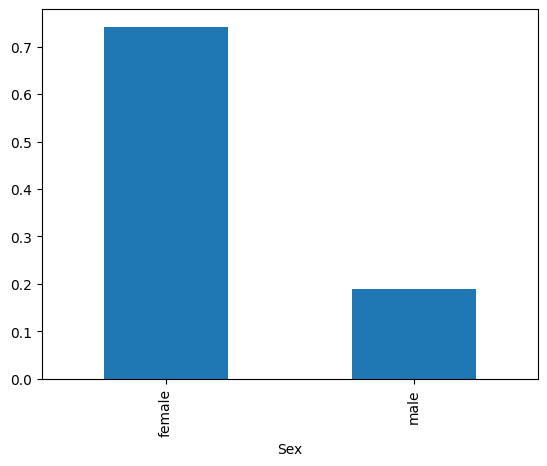

In [ ]:
titanic['Sex'].unique()
survival_rates = titanic.groupby('Sex')['Survived'].mean()
survival_rates.plot.bar()
plt.show()

In [ ]:
print(titanic['Age'].min(), titanic['Age'].max())
print((titanic['Age'].max() - titanic['Age'].min()) / 7 )

ageMask = titanic['Age'].notna()
valid_ages = titanic[ageMask]
# valid_ages.head()
sorted_by_age = valid_ages.sort_values(by='Age')
sorted_by_age.head()

0.42 80.0
11.368571428571428


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Thomas, Master. Assad Alexander",804,1,3,male,0.42,0,1,2625,8.5167,NaN,C
"Hamalainen, Master. Viljo",756,1,2,male,0.67,1,1,250649,14.5000,NaN,S
"Baclini, Miss. Eugenie",645,1,3,female,0.75,2,1,2666,19.2583,NaN,C
"Baclini, Miss. Helene Barbara",470,1,3,female,0.75,2,1,2666,19.2583,NaN,C
"Caldwell, Master. Alden Gates",79,1,2,male,0.83,0,2,248738,29.0000,NaN,S


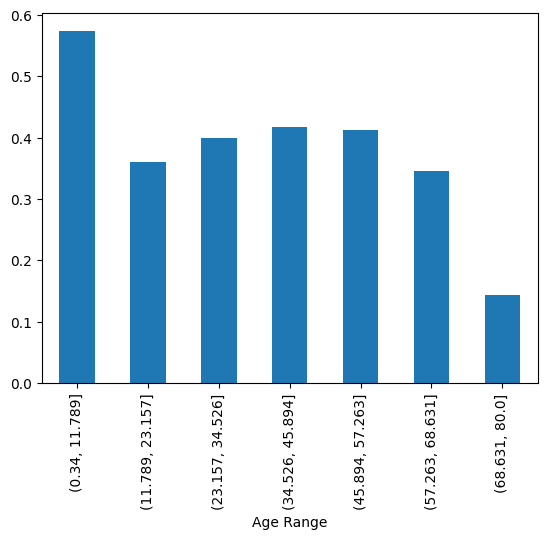

In [ ]:
sorted_by_age['Age Range'] = pd.cut(sorted_by_age['Age'], 7)
# sorted_by_age['Age Range']
survival_rates = sorted_by_age.groupby('Age Range')['Survived'].mean()
survival_rates.plot.bar()
plt.show()

In [ ]:
titanic[titanic['Sex'] == 'male']['Age'].mean()
titanic[titanic['Sex'] == 'female']['Age'].mean()

27.915708812260537

In [ ]:
# Filtra os passageiros dada uma coluna (sexo)
male_passengers = titanic[titanic['Sex'] == 'male']
female_passengers = titanic[titanic['Sex'] == 'female']

# Para cada tabela (M/F) filtrar novamente apenas pelos que tem idade válida
valid_male_ages = male_passengers[male_passengers['Age'].notna()]
valid_female_ages = female_passengers[female_passengers['Age'].notna()]

# Ordena a tabela baseado em uma coluna especifica, no caso idade (Age)
m_sorted_by_age = valid_male_ages.sort_values(by='Age')
f_sorted_by_age = valid_female_ages.sort_values(by='Age')

# Divide ela em 7 faixas etárias
m_sorted_by_age['Age Range'] = pd.cut(m_sorted_by_age['Age'], 7)
f_sorted_by_age['Age Range'] = pd.cut(f_sorted_by_age['Age'], 7)

# Calcula a taxa de sobrevivência para cada uma das faixas etárias
m_survival_rates = m_sorted_by_age.groupby('Age Range')['Survived'].mean()
f_survival_rates = f_sorted_by_age.groupby('Age Range')['Survived'].mean()

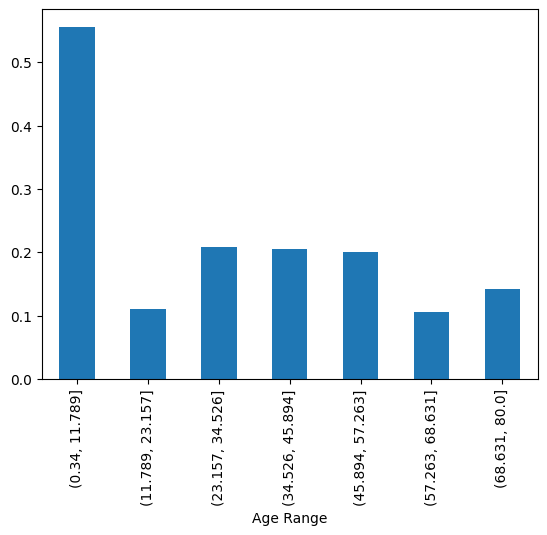

In [ ]:
m_survival_rates.plot.bar()
plt.show()

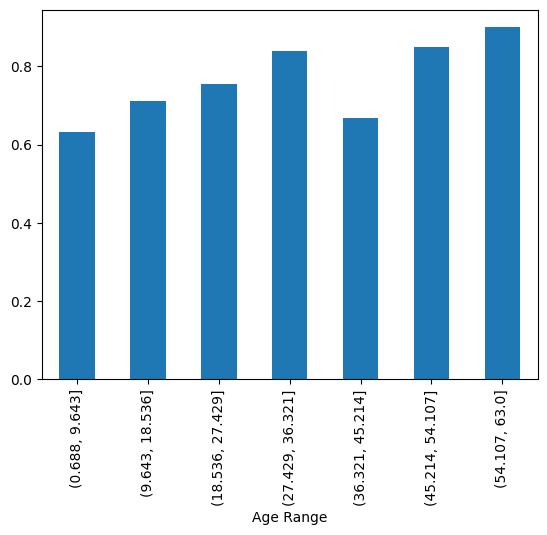

In [ ]:
f_survival_rates.plot.bar()
plt.show()

# Parte 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

url = 'https://learnenough.s3.amazonaws.com/titanic.csv'
titanic = pd.read_csv(url)
# titanic.head()

In [ ]:
columns_to_drop = ['Name', 'PassengerId', 'Cabin', 'Embarked',
                   'SibSp', 'Parch', 'Ticket', 'Fare']

for column in columns_to_drop:
  titanic = titanic.drop(column, axis=1)

In [ ]:
for column in ['Age', 'Sex', 'Pclass']:
  titanic = titanic[titanic[column].notna()]

In [ ]:
sex_int = {'male': 0, 'female': 1}
titanic['Sex'] = titanic['Sex'].map(sex_int)

titanic.head()

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [ ]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

print(X.head())
print('-'*40)
print(y.head())

   Pclass  Sex   Age
0       3    0  22.0
1       1    1  38.0
2       3    1  26.0
3       1    1  35.0
4       3    0  35.0
----------------------------------------
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
acc_dt = clf_dt.score(X_test, y_test)
print(acc_dt)

0.8547486033519553


In [ ]:
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
acc_nb = clf_nb.score(X_test, y_test)
print(acc_nb)

0.770949720670391


In [ ]:
clf_p = Perceptron()
clf_p.fit(X_train, y_train)
acc_p = clf_p.score(X_test, y_test)
print(acc_p)

0.7430167597765364


In [ ]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
acc_rf = clf_rf.score(X_test, y_test)
print(acc_rf)

0.8435754189944135


In [ ]:
print('-'*30)
print(f'DT: {acc_dt:.6f}')
print(f'RF: {acc_rf:.6}')
print(f'NB: {acc_nb:.4}')
print(f'Pe: {acc_p:.4}')
print('-'*30)

------------------------------
DT: 0.854749
RF: 0.843575
NB: 0.7709
Pe: 0.743
------------------------------


In [ ]:
print(clf_rf.feature_importances_)
print(X_train.columns)

[0.17273565 0.35722614 0.47003821]
Index(['Pclass', 'Sex', 'Age'], dtype='object')


In [ ]:
print(clf_dt.feature_importances_)
print(X_train.columns)

[0.17152041 0.41030625 0.41817334]
Index(['Pclass', 'Sex', 'Age'], dtype='object')


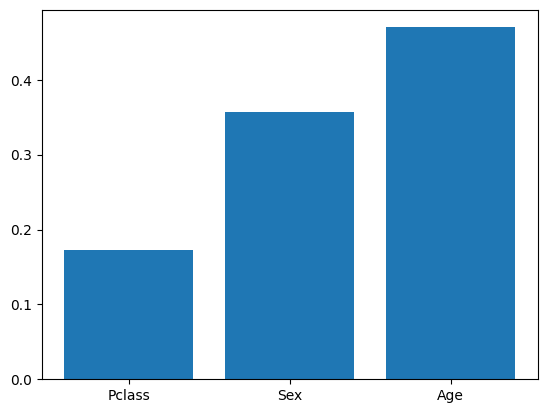

In [ ]:
fig, ax = plt.subplots()
ax.bar(X_train.columns, clf_rf.feature_importances_)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

clf_rf = RandomForestClassifier(random_state=1)
scores = cross_val_score(clf_rf, X_train, y_train)
print(f'Por fold: {scores}')
print(f'Media das folds: {scores.mean()}')

Por fold: [0.80373832 0.75700935 0.69158879 0.79439252 0.76635514]
Media das folds: 0.7626168224299066



Alterar estes dois parametros

n_estimators = ?

max_depth = ?



Ver os resultados, e se a ordem de importancia de features tbm muda, ou não

In [ ]:
clf_rf = RandomForestClassifier(max_depth=3, random_state=1, n_estimators=200)
clf_rf.fit(X_train, y_train)
acc_rf = clf_rf.score(X_test, y_test)
print(acc_rf)
print(clf_rf.feature_importances_)

0.8379888268156425
[0.30023247 0.52391287 0.17585466]


In [ ]:
clf_dt = DecisionTreeClassifier(max_depth=3, random_state=1)
clf_dt.fit(X_train, y_train)
acc_dt = clf_dt.score(X_test, y_test)
print(acc_dt)
print(clf_dt.feature_importances_)

0.8100558659217877
[0.22902883 0.65709106 0.11388011]
